In [1]:
import pandas as pd
import numpy as np
from logistic_cost import compute_cost_logistic
from compute_gd_logistic import compute_gradient_logistic, gradient_descent 
from sigmoid import sigmoid

In [7]:
# load dataset
df = pd.read_csv(r'dataset\fried_fish_balls_dataset.csv')

# first 5 rows
print(df.head())

   frying_time_minutes  delicious
0                  2.0          0
1                  2.5          0
2                  3.0          0
3                  3.2          0
4                  3.4          0


In [9]:
# x_train (features) and y_train (labels)
x_train = df[['frying_time_minutes']].values
y_train = df['delicious'].values

# check the shape of x_train and y_train
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# check the type of x_train and y_train
print(f"x_train type: {type(x_train)}")
print(f"y_train type: {type(y_train)}")


x_train shape: (30, 1)
y_train shape: (30,)
x_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>


In [13]:
# initialize parameters and learning rate
n = x_train.shape[1]  # number of features
w = np.zeros(n)  # weights
b = 0  # bias
alpha = 0.1  # learning rate
num_iterations = 10000  # number of iterations

In [14]:
# calculate the cost
cost = compute_cost_logistic(x_train, y_train, w, b)
print(f"Initial cost: {cost}")

Initial cost: 0.693147180559945


In [29]:
# perform gradient descent
w_final = np.zeros(n)
b_final = 0
w_final, b_final, history = gradient_descent(x_train, y_train, w, b, alpha, num_iterations)

Iteration    0: Cost 0.673789122700939   
Iteration 1000: Cost 0.67257781267846   
Iteration 2000: Cost 0.6725728592954922   
Iteration 3000: Cost 0.672572813011428   
Iteration 4000: Cost 0.6725728125786733   
Iteration 5000: Cost 0.6725728125746266   
Iteration 6000: Cost 0.6725728125745888   
Iteration 7000: Cost 0.6725728125745886   
Iteration 8000: Cost 0.6725728125745886   
Iteration 9000: Cost 0.6725728125745886   


In [30]:
print(f"Final weights: {w_final}")
print(f"Final bias: {b_final}")

Final weights: [-0.03377649]
Final bias: -0.22377780594354832


In [31]:
# new predictions
x_new = 1  # new frying times
predictions = sigmoid(x_new * w_final + b_final)
print(predictions)

[0.43596501]


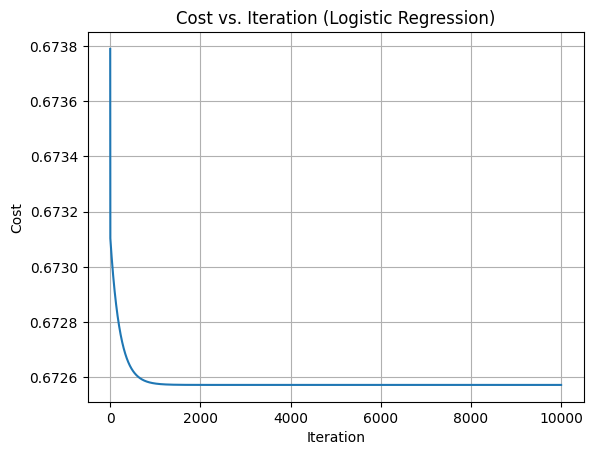

In [ ]:
# plot the cost history
import matplotlib.pyplot as plt

plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration (Logistic Regression)")
plt.grid(True)
plt.show()


In [ ]:
# the result is not good, because Logistic regression is sensitive with small dataset. There is another version where I use feature scaling to improve the result.

In [33]:
# feature scaling
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train_scaled = (x_train - x_mean) / x_std

print(x_train_scaled[:5])  # print first 5 rows of scaled data

[[-1.89165193]
 [-1.61264722]
 [-1.33364251]
 [-1.22204063]
 [-1.11043874]]


In [51]:
# initalize parameters again
w_final_scaled = np.zeros(n)
b_final_scaled = 0


In [52]:
# perform gradient descent
w_final_scaled, b_final_scaled, history_scaled = gradient_descent(x_train_scaled, y_train, w_final_scaled, b_final_scaled, alpha, num_iterations)

print(f"Final weights (scaled): {w_final_scaled}")
print(f"Final bias (scaled): {b_final_scaled}")

Iteration    0: Cost 0.6921388946956917   
Iteration 1000: Cost 0.6725728125745886   
Iteration 2000: Cost 0.6725728125745885   
Iteration 3000: Cost 0.6725728125745885   
Iteration 4000: Cost 0.6725728125745885   
Iteration 5000: Cost 0.6725728125745885   
Iteration 6000: Cost 0.6725728125745885   
Iteration 7000: Cost 0.6725728125745885   
Iteration 8000: Cost 0.6725728125745885   
Iteration 9000: Cost 0.6725728125745885   
Final weights (scaled): [-0.06053033]
Final bias (scaled): -0.40583310849283766


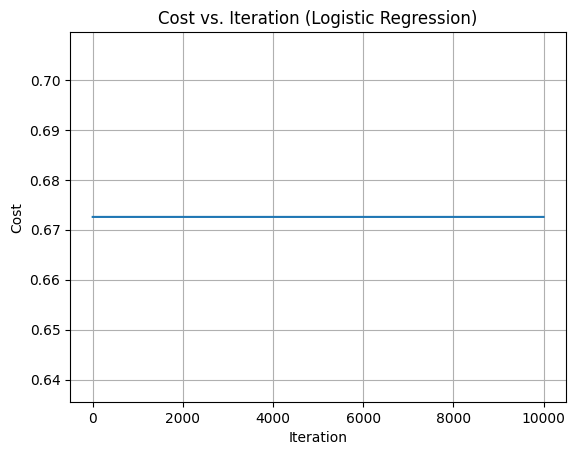

In [47]:
# plot the cost history
import matplotlib.pyplot as plt

plt.plot(history_scaled)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration (Logistic Regression)")
plt.grid(True)
plt.show()


In [42]:
# new prediction agaim
x_new = 5.5
x_new_scaled = (x_new - x_mean) / x_std  # new frying times with scaling
predictions_scaled = sigmoid(x_new_scaled * w_final_scaled + b_final_scaled)
print(predictions_scaled)


[0.39902038]


In [45]:
for t in [1.0, 3.0, 4.5, 5.5, 6.0, 7.0]:
    x_scaled = (t - x_mean) / x_std
    prob = sigmoid(x_scaled * w_final_scaled + b_final_scaled)
    print(prob)

[0.43596501]
[0.41943157]
[0.40714704]
[0.39902038]
[0.39497752]
[0.38693523]


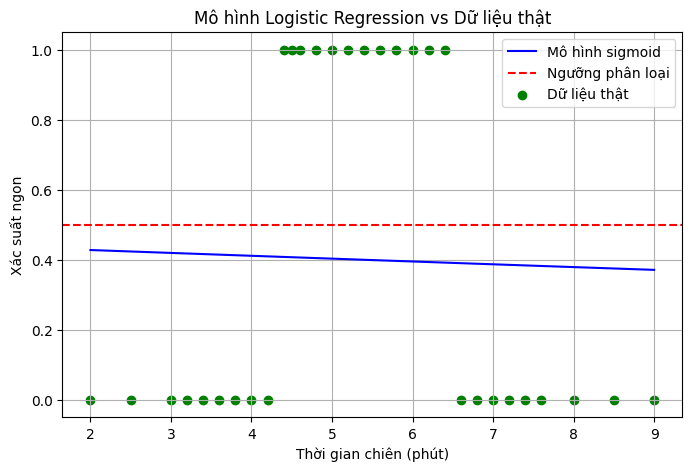

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Tạo các điểm thời gian chiên từ 2 đến 9 phút
x_vals = np.linspace(2, 9, 100).reshape(-1, 1)

# 2. Chuẩn hóa theo mean/std lúc huấn luyện
x_vals_scaled = (x_vals - x_mean) / x_std

# 3. Tính xác suất dự đoán
z_vals = np.dot(x_vals_scaled, w_final_scaled) + b_final_scaled
probs = sigmoid(z_vals)

# 4. Vẽ đường sigmoid và dữ liệu thật
plt.figure(figsize=(8, 5))
plt.plot(x_vals, probs, label="Mô hình sigmoid", color='blue')
plt.axhline(0.5, color='red', linestyle='--', label="Ngưỡng phân loại")

# Dữ liệu thật
plt.scatter(x_train, y_train, color='green', label='Dữ liệu thật')

plt.xlabel("Thời gian chiên (phút)")
plt.ylabel("Xác suất ngon")
plt.title("Mô hình Logistic Regression vs Dữ liệu thật")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# I think that logistic regression is not suitable here, as time increases, the probability of deliciousness decreases, making it impossible to use logistic regression.